In [ ]:
import pandas as pd 
from scipy.io import mmread
import numpy as np
import matplotlib.pyplot as plt
from dmt import DMT
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set_style('dark')

/opt/mamba/envs/ontemn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def read_mtx(x_file_path, y_file_path, dtype='int32', labelencoder=False):
    x = mmread(x_file_path).astype(dtype)
    if labelencoder:
        y = pd.read_csv(y_file_path, sep='\t', header=None)
        label_encoder = LabelEncoder()
        y = label_encoder.fit_transform(y)
    else:
        y = pd.read_csv(y_file_path, sep='\t', header=None).to_numpy()
    return x, y

def get_data_info(x, y):
    ''''''
    print(f"The size of x: {len(x)}")
    print(f"The shape of x: {x.shape}")
    print(f"The size of y: {len(y)}")
    print(f"The uniques of y: {len(np.unique(y))}")

In [3]:
x_cel_path = "/root/ontemn/Data/celegan_preprocess.mtx"
y_cel_em_path = "/root/ontemn/Data/celegan_embryo_time.tsv" 

X_cel, y_cel_em = read_mtx(x_cel_path, y_cel_em_path, labelencoder=True)
get_data_info(X_cel, y_cel_em) 


The size of x: 86024
The shape of x: (86024, 50)
The size of y: 86024
The uniques of y: 12


/opt/mamba/envs/ontemn/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
dmt = DMT(num_fea_aim=0.8, device_id=3, epochs=1000)
X_cel_dmt, X_cel_umap, X_cel_tsne, X_cel_pca  = dmt.compare(X_cel, plot="T1.png")

Seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | mse       | CrossEntropyLoss | 0      | train
1 | Loss      | MyLoss           | 0      | train
2 | PM_root   | Linear           | 51     | train
3 | model_pat | Sequential       | 229 K  | train
4 | model_b   | ModuleList       | 81.9 K | train
-------------------------------------------------------
311 K     Trainable params
0         Non-trainable params
311 K     Total params
1.247     Total estimated model params size (MB)
54        Modules in train mode
0         Modules in eval mode


Epoch 999: 100%|██████████| 86/86 [00:02<00:00, 37.46it/s]                  

`Trainer.fit` stopped: `max_epochs=1000` reached.


Epoch 999: 100%|██████████| 86/86 [00:02<00:00, 37.41it/s]


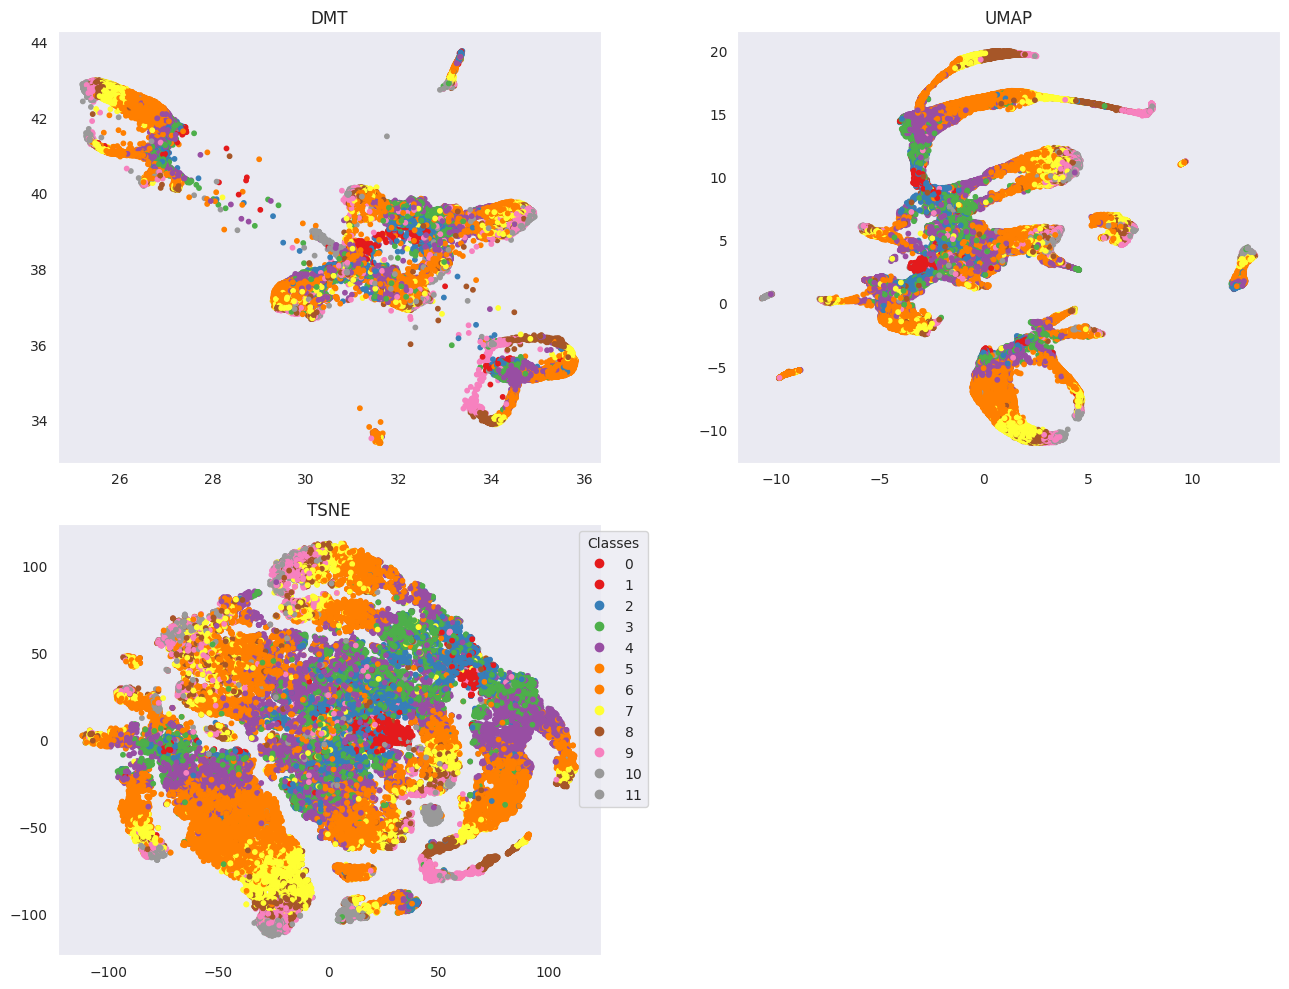

In [12]:

plt.figure(figsize=(13, 10))

# 创建散点图
ax_1 = plt.subplot(2, 2, 1)
sc1 = ax_1.scatter(X_cel_dmt[:, 0], X_cel_dmt[:, 1], c=y_cel_em, cmap='Set1', s=10)
ax_1.set_title('DMT')

ax_2 = plt.subplot(2, 2, 2)
sc2 = ax_2.scatter(X_cel_umap[:, 0], X_cel_umap[:, 1], c=y_cel_em, cmap='Set1', s=10)
ax_2.set_title('UMAP')

ax_3 = plt.subplot(2, 2, 3)
sc3 = ax_3.scatter(X_cel_tsne[:, 0], X_cel_tsne[:, 1], c=y_cel_em, cmap='Set1', s=10)
ax_3.set_title('TSNE')

# 创建共享图例
handles, labels = sc3.legend_elements()
plt.legend(handles, labels, title="Classes", loc='best', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()